In [2]:
import zipfile

zip_file_paths = ['trainImages.zip', 'validationImages.zip']

for path in zip_file_paths:
    name = str(path)
    with zipfile.ZipFile(path, "r") as zip_ref:
        zip_ref.extractall(f'unzipped/{name.split(".")[0]}')

In [320]:
import pandas as pd

df_validation = pd.read_csv('unzipped/validationImages/labels/detections.csv')
df_validation.head()

ImageID  Source LabelName  Confidence    XMin    XMax    YMin  \
0  0001eeaf4aed83f9  xclick  /m/0cmf2           1  0.0227  0.9642  0.0710   
1  000595fe6fee6369  xclick  /m/02wbm           1  0.0000  1.0000  0.0000   
2  000595fe6fee6369  xclick  /m/02xwb           1  0.1414  0.1797  0.6763   
3  000595fe6fee6369  xclick  /m/02xwb           1  0.2135  0.2533  0.2993   
4  000595fe6fee6369  xclick  /m/02xwb           1  0.2327  0.2887  0.4900   

     YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  IsInside  
0  0.8005           0            0          0            0         0  
1  1.0000           0            0          1            0         0  
2  0.7317           0            0          0            0         0  
3  0.3548           1            0          0            0         0  
4  0.5455           1            0          0            0         0

In [321]:
import pandas as pd

df_train = pd.read_csv('unzipped/trainImages/labels/detections.csv')
df_train.head()

ImageID  Source  LabelName  Confidence    XMin    XMax    YMin  \
0  000002b66c9c498e  xclick  /m/01g317           1  0.0125  0.1953  0.1484   
1  000002b66c9c498e  xclick  /m/01g317           1  0.0250  0.2766  0.7141   
2  000002b66c9c498e  xclick  /m/01g317           1  0.1516  0.3109  0.1984   
3  000002b66c9c498e  xclick  /m/01g317           1  0.2562  0.4297  0.6516   
4  000002b66c9c498e  xclick  /m/01g317           1  0.2578  0.3469  0.2359   

     YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  XClick1X  \
0  0.5875           0            1  ...            0         0    0.1484   
1  0.9484           0            1  ...            0         0    0.0250   
2  0.5906           1            0  ...            0         0    0.2437   
3  0.9250           1            0  ...            0         0    0.3156   
4  0.3859           1            0  ...            0         0    0.3172   

   XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  XClick4Y  
0    0.0125    0.0594    0.1953    0.1484    0.3578    0.5875    0.3250  
1    0.2484    0.2766    0.2141    0.9141    0.7141    0.7828    0.9484  
2    0.1516    0.3109    0.2625    0.1984    0.4344    0.5078    0.5906  
3    0.4297    0.2562    0.4234    0.6516    0.9219    0.8266    0.9250  
4    0.2578    0.3469    0.3078    0.2359    0.2891    0.3484    0.3859  

[5 rows x 21 columns]

In [28]:
len(df_train)

14610229

In [29]:
len(df_validation)

303980

In [6]:
data_path_validation = "unzipped/validationImages/data/*.jpg"
data_path_train = "unzipped/trainImages/data/*.jpg"


In [7]:
import glob
counter = 0

img_paths = data_path_train
folder = glob.glob(img_paths)

for i in folder:
    counter += 1
print(counter)

1000


In [8]:
#Get image ids:

import glob
train_list_ids = []
validation_list_ids = []

def get_ids(split, print_this, to_append_list):
    start = 0
    end = 0
    if split == data_path_train:
        start, end = 26, 42
    elif split == data_path_validation:
        start, end = 31, 47
    else:
        raise Exception("Invalid Parameter")
    folder = split
    img_paths = glob.glob(folder)
    img_ids = to_append_list
    
    for i in img_paths:
        id = i[start:end]
        img_ids.append(id)
    print(len(img_ids))
    print(print_this)

In [9]:
get_ids(data_path_train, "I finished the task", train_list_ids)

1000
I finished the task


In [10]:
train_list_ids[0]

'30753470d5f58abe'

In [11]:
get_ids(data_path_validation, "I finished the task", validation_list_ids)

10
I finished the task


In [12]:
validation_list_ids[1]

'01eeeccf29b85fa0'

In [322]:
train_classes_df = pd.read_csv("unzipped/trainImages/metadata/classes.csv", names = ['className', 'Object'])
validation_classes_df = pd.read_csv("unzipped/validationImages/metadata/classes.csv", names = ['className', 'Object'])

In [323]:
train_identifier = train_classes_df[train_classes_df['Object'] == 'Ball']
validation_identifier = validation_classes_df[validation_classes_df['Object'] == 'Ball']

print(train_identifier)
print('------------------')
print(validation_identifier)

   className Object
37  /m/018xm   Ball
------------------
   className Object
37  /m/018xm   Ball


In [324]:
import random

def random_row_from_df(split):
    dataframe = ""
    
    if split == "train":
        dataframe, ids_to_check = df_train, train_list_ids
    elif split == "validation":
        dataframe, ids_to_check = df_validation, validation_list_ids
    else:
        raise Exception("Invalid parameter, must be either train or validation")
    
    img_ids_len = len(ids_to_check)
    rand = random.randint(0, img_ids_len - 1)
    id = ids_to_check[rand]
    print(id)
    r = dataframe.loc[(dataframe.ImageID == id) & (dataframe.LabelName == '/m/018xm')]

In [16]:
random_row_from_df("train")

2d2ac68bf41a2174


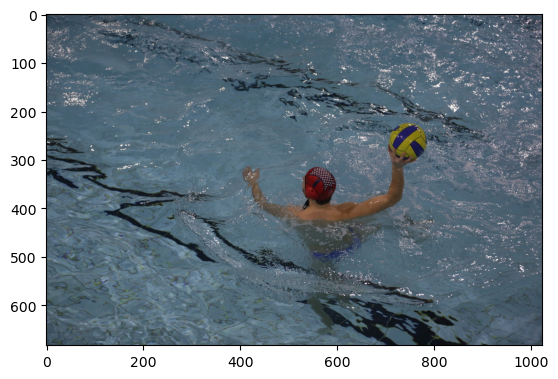

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image

validation_images_path = "unzipped/validationImages/data/*.jpg"
train_images_path = "unzipped/trainImages/data/*.jpg"

def visualize_random_image(split):
    split_path = train_images_path if split == 'train' else validation_images_path if split == 'validation' else 0
    if split_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    images_folder = split_path
    images_paths = glob.glob(images_folder)
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images -1)
    random_image = images_paths[random_int]
    img = mpimg.imread(random_image)
    
    #create the figure and axes
    fig,ax = plt.subplots()
    ax.imshow(img)
    imgplot = plt.imshow(img)
    plt.show()

visualize_random_image("train")

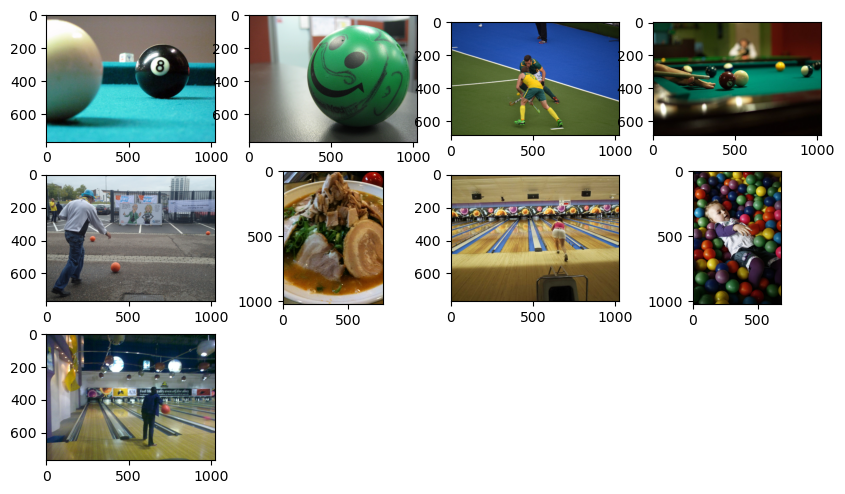

In [18]:
import matplotlib.pyplot as plt
import glob
fig = plt.figure(figsize=(10,10))

columns = 4
rows = 5

validation_images_path = "unzipped/validationImages/data/*.jpg"
train_images_path = "unzipped/trainImages/data/*.jpg"

def visualize_many(from_num, to_num, dataset):
    dataset_path = train_images_path if dataset == 'train' else validation_images_path if dataset == 'validation' else 0
    if dataset_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    images_paths = glob.glob(dataset_path)
    
    index_counter = 1
    for i in range(from_num, to_num):
        counter = i
        images = images_paths[counter]
        img = mpimg.imread(images)
        fig.add_subplot(rows, columns, index_counter)
        plt.imshow(img)
        index_counter += 1
    plt.show()
    
visualize_many(0, 9, "validation")
    

In [19]:
df_validation.loc[(df_validation['ImageID'] == '0430797dd00cd443') & (df_validation.LabelName == '/m/018xm')]

ImageID  Source LabelName  Confidence     XMin      XMax  \
4887  0430797dd00cd443  xclick  /m/018xm           1  0.68125  0.734375   

          YMin    YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
4887  0.560417  0.6375           0            0          0            0   

      IsInside  
4887         0

1024 768


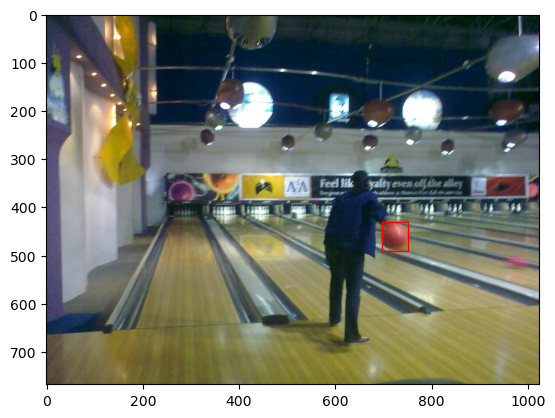

In [22]:
#Theory Lesson

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('unzipped/validationImages/data/0430797dd00cd443.jpg')

fig, ax = plt.subplots()

ax.imshow(im)

image_width, image_height = im.size
print(image_width, image_height) #768 1024

xmin = 0.68125
xmax = 0.734375
ymin = 0.560417
ymax = 0.6375

#New Coordinates

xmin = 0.68125 * image_width
xmax = 0.734375 * image_width
ymin = 0.560417 * image_height
ymax = 0.6375 * image_height

width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')

ax.add_patch(rect)
plt.show()


unzipped/trainImages/data/144c3f6ec14f583e.jpg
0.874298 0.969101 0.314024 0.487043
895.281152 992.359424 296.124632 459.281549


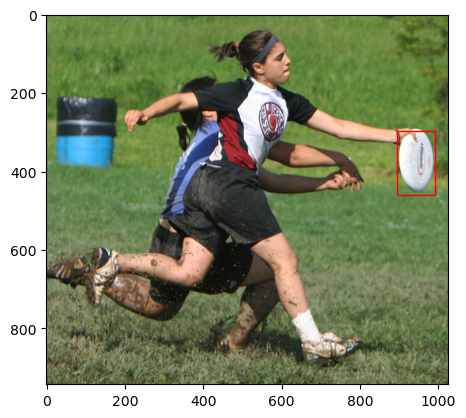

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import glob
from PIL import Image

validation_images_path = "unzipped/validationImages/data/*.jpg"
train_images_path = "unzipped/trainImages/data/*.jpg"

def visualize_bb(dataset):
    images_path = train_images_path if dataset == 'train' else validation_images_path if dataset == 'validation' else 0
    if images_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    
    start = 0
    end = 0
    
    if dataset == 'train':
        start, end, df, split = 26, 42, df_train, "trainImages"
    elif dataset == 'validation':
        start, end, df, split = 31, 47, df_validation, "validationImages"
    else:
        raise Exception("Invalid parameter")
        
    image_folder = images_path
    images_paths = glob.glob(image_folder)
    
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images - 1)
    random_image = images_paths[random_int]
    print(random_image)
    img = Image.open(random_image)
    id_of_image = random_image[start:end]
    
    df_row = df.loc[(df.ImageID == id_of_image) & (df.LabelName == '/m/018xm')]
    
    image_width, image_height = img.size
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    for index, row in df_row.iterrows():
        print(row['XMin'], row['XMax'], row['YMin'], row['YMax'])
        
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        
        
        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        
        print(new_xmin, new_xmax, new_ymin, new_ymax)
        
        width = new_xmax - new_xmin
        height = new_ymax - new_ymin
        
        rect = patches.Rectangle((new_xmin, new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax.add_patch(rect)
    plt.show()
    
visualize_bb("train")
        

In [26]:
print(len(df_train))
print(len(df_validation))

14610229
303980


In [325]:
def clean_dataframe(df_for_train, df_for_validation):
    df_train_cleansed = df_train[df_train['LabelName'].str.contains('/m/018xm')]
    df_validation_cleansed = df_validation[df_validation['LabelName'].str.contains('/m/018xm')]
    
    return df_train_cleansed, df_validation_cleansed

df_train_cleansed, df_validation_cleansed = clean_dataframe(df_train, df_validation)

In [326]:
len(df_train_cleansed)

#We have 1000 train images, but some of those images have multiple balls, and the 6845 is the number

6845

In [327]:
6845/1000

6.845

In [328]:
len(df_validation_cleansed)

343

In [329]:
df_validation_cleansed

ImageID  Source LabelName  Confidence    XMin    XMax  \
427     0052ea56ee869426  xclick  /m/018xm           1  0.0000  0.3375   
428     0052ea56ee869426  xclick  /m/018xm           1  0.5266  0.8484   
2542    01eeeccf29b85fa0  xclick  /m/018xm           1  0.3438  0.9516   
2949    022caa5e84da4026  xclick  /m/018xm           1  0.3450  0.3874   
3194    02760ace01bd113f  xclick  /m/018xm           1  0.0000  1.0000   
...                  ...     ...       ...         ...     ...     ...   
298384  fb3fed6d3c8c3276  xclick  /m/018xm           1  0.2281  0.3016   
298385  fb3fed6d3c8c3276  xclick  /m/018xm           1  0.4859  0.5156   
298386  fb3fed6d3c8c3276  xclick  /m/018xm           1  0.7688  0.9344   
300379  fd1150844d3a7732  xclick  /m/018xm           1  0.4086  0.5324   
301103  fd64659b9f5af02a  xclick  /m/018xm           1  0.3270  0.9647   

          YMin    YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
427     0.0333  0.8354           0            1          0            0   
428     0.2292  0.6583           0            0          0            0   
2542    0.0792  0.8812           0            0          0            0   
2949    0.1629  0.2232           1            0          0            0   
3194    0.0000  1.0000           0            0          1            0   
...        ...     ...         ...          ...        ...          ...   
298384  0.1167  0.2188           0            0          0            0   
298385  0.1521  0.1938           0            0          0            0   
298386  0.2604  0.4771           0            0          0            0   
300379  0.5619  0.7456           1            0          0            0   
301103  0.0466  1.0000           0            0          0            0   

        IsInside  
427            0  
428            0  
2542           0  
2949           0  
3194           0  
...          ...  
298384         0  
298385         0  
298386         0  
300379         0  
301103         0  

[343 rows x 13 columns]

In [330]:
df_train_cleansed

ImageID  Source LabelName  Confidence    XMin    XMax  \
642       00006685513e6bc4  xclick  /m/018xm           1  0.4281  0.4500   
11080     000819fd2a0433a9  xclick  /m/018xm           1  0.0767  0.1833   
18671     000f234939e98c68  xclick  /m/018xm           1  0.5521  0.5858   
18819     000f31e71b56641e  xclick  /m/018xm           1  0.5644  0.5806   
20926     00114337b89792cc  xclick  /m/018xm           1  0.6257  0.6510   
...                    ...     ...       ...         ...     ...     ...   
14579627  ff6036e6771c1e20  xclick  /m/018xm           1  0.3644  0.4844   
14589251  ff95b5e9614b22a4  xclick  /m/018xm           1  0.1938  0.3362   
14596249  ffbb37b1cd2db49f  xclick  /m/018xm           1  0.1501  0.2908   
14599079  ffc7ab8a217d7680  xclick  /m/018xm           1  0.3519  0.3881   
14606055  ffe7ece65d2360dc  xclick  /m/018xm           1  0.0000  0.9319   

            YMin    YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
642       0.3324  0.3616           0            0  ...            0         0   
11080     0.9644  0.9994           0            1  ...            0         0   
18671     0.5700  0.6125           1            0  ...            0         0   
18819     0.9062  0.9287           0            0  ...            0         0   
20926     0.9287  0.9475           0            0  ...            0         0   
...          ...     ...         ...          ...  ...          ...       ...   
14579627  0.5633  0.7208           1            0  ...            0         0   
14589251  0.7622  0.9802           1            0  ...            0         0   
14596249  0.5650  0.6625           1            0  ...            0         0   
14599079  0.5641  0.6136           0            0  ...            0         0   
14606055  0.0029  0.9641           1            1  ...            0         0   

          XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  \
642         0.4387    0.4500    0.4387    0.4281    0.3324    0.3506   
11080       0.0767    0.1358    0.1808    0.1833    0.9988    0.9644   
18671       0.5544    0.5590    0.5858    0.5521    0.6125    0.5700   
18819       0.5644    0.5706    0.5806    0.5731    0.9231    0.9062   
20926       0.6332    0.6510    0.6388    0.6257    0.9287    0.9356   
...            ...       ...       ...       ...       ...       ...   
14579627    0.4250    0.4844    0.4238    0.3644    0.5633    0.6650   
14589251    0.1938    0.2669    0.3362    0.2706    0.8802    0.7622   
14596249    0.1501    0.2064    0.2908    0.2402    0.5975    0.5650   
14599079    0.3519    0.3738    0.3881    0.3775    0.5933    0.5641   
14606055    0.0000    0.2731    0.9319    0.4375    0.3184    0.0029   

          XClick3Y  XClick4Y  
642         0.3616    0.3488  
11080       0.9888    0.9994  
18671       0.5887    0.5975  
18819       0.9137    0.9287  
20926       0.9475    0.9387  
...            ...       ...  
14579627    0.7208    0.6408  
14589251    0.8694    0.9802  
14596249    0.6038    0.6625  
14599079    0.5950    0.6136  
14606055    0.3466    0.9641  

[6845 rows x 21 columns]

In [331]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train_cleansed, test_size = 0.2, random_state = 42)

In [273]:
train

ImageID  Source LabelName  Confidence    XMin    XMax  \
8280217   8cb2fc651ba61926  xclick  /m/018xm           1  0.7113  0.7488   
8100490   898dcf28e44423de  xclick  /m/018xm           1  0.3151  0.3609   
289560    033615cd34d38556  xclick  /m/018xm           1  0.3844  0.3956   
1212441   120d5a186fec08e8  xclick  /m/018xm           1  0.3381  0.5808   
2457841   277db4b6aa286be3  xclick  /m/018xm           1  0.4062  0.5319   
...                    ...     ...       ...         ...     ...     ...   
7819435   8490817c9a548c68  xclick  /m/018xm           1  0.8120  0.9400   
11190081  bfbdf54a02277c05  xclick  /m/018xm           1  0.7025  0.7269   
11232230  c0799084b4d6c897  xclick  /m/018xm           1  0.0681  0.1181   
11576971  c688d317fa7f19f4  xclick  /m/018xm           1  0.4631  0.5487   
1434078   15cfb6f625e92032  xclick  /m/018xm           1  0.4736  0.6289   

            YMin    YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
8280217   0.4522  0.5056           0            0  ...            0         0   
8100490   0.2253  0.2947           1            0  ...            1         0   
289560    0.5933  0.6045           0            0  ...            0         0   
1212441   0.0312  0.2519           0            0  ...            0         0   
2457841   0.1133  0.2892           1            0  ...            0         0   
...          ...     ...         ...          ...  ...          ...       ...   
7819435   0.1093  0.2146           1            0  ...            0         0   
11190081  0.5679  0.5933           0            0  ...            0         0   
11232230  0.4728  0.5460           1            0  ...            0         0   
11576971  0.0000  0.1275           0            1  ...            0         0   
1434078   0.3098  0.5551           1            0  ...            1         0   

          XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  \
8280217     0.7244    0.7113    0.7294    0.7488    0.4522    0.4784   
8100490     0.3151    0.3363    0.3609    0.3504    0.2758    0.2253   
289560      0.3856    0.3956    0.3956    0.3844    0.6045    0.5933   
1212441     0.4406    0.3381    0.4740    0.5808    0.0312    0.1288   
2457841     0.4062    0.4750    0.5319    0.4606    0.2017    0.1133   
...            ...       ...       ...       ...       ...       ...   
7819435     0.8800    0.9400    0.8740    0.8120    0.1093    0.1676   
11190081    0.7125    0.7269    0.7125    0.7025    0.5679    0.5828   
11232230    0.0681    0.0938    0.1181    0.1031    0.5272    0.4728   
11576971    0.4631    0.4963    0.5487    0.5231    0.0257    0.0000   
1434078     0.4736    0.5664    0.6289    0.5752    0.4361    0.3098   

          XClick3Y  XClick4Y  
8280217     0.5056    0.4906  
8100490     0.2568    0.2947  
289560      0.6022    0.5955  
1212441     0.2519    0.1306  
2457841     0.2258    0.2892  
...            ...       ...  
7819435     0.2146    0.1595  
11190081    0.5933    0.5828  
11232230    0.5113    0.5460  
11576971    0.0647    0.1275  
1434078     0.4479    0.5551  

[5476 rows x 21 columns]

In [274]:
test

ImageID  Source LabelName  Confidence    XMin    XMax  \
8899357   978a3c0b64724671  xclick  /m/018xm           1  0.4437  0.5219   
11390377  c341998b56454a4d  xclick  /m/018xm           1  0.6892  0.8275   
8971840   98c8e960300f6499  xclick  /m/018xm           1  0.7087  0.8675   
2921134   2f7d70b9f40700a7  xclick  /m/018xm           1  0.3278  0.6396   
6515022   6dd979cdd7be55dd  xclick  /m/018xm           1  0.3862  0.4963   
...                    ...     ...       ...         ...     ...     ...   
6175646   6803783ac4fa78b6  xclick  /m/018xm           1  0.8688  0.8812   
5476663   5beec026ed2c9e6b  xclick  /m/018xm           1  0.2562  0.3181   
14140308  f68e84ee16f4d55b  xclick  /m/018xm           1  0.3275  0.3469   
998994    0e788a2c4717285a  xclick  /m/018xm           1  0.7000  0.7638   
10933427  bb4a4fb0d8fc7d7a  xclick  /m/018xm           1  0.1694  0.2269   

            YMin    YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
8899357   0.7521  0.8229           1            0  ...            0         0   
11390377  0.7617  0.8925           0            0  ...            1         0   
8971840   0.4137  0.6754           1            0  ...            0         0   
2921134   0.4110  0.8980           0            0  ...            0         0   
6515022   0.5131  0.6754           1            0  ...            0         0   
...          ...     ...         ...          ...  ...          ...       ...   
6175646   0.3342  0.3475           0            0  ...            0         0   
5476663   0.8506  0.9162           1            0  ...            0         0   
14140308  0.8086  0.8377           0            0  ...            0         0   
998994    0.9726  0.9991           0            1  ...            0         0   
10933427  0.8606  0.9096           1            0  ...            0         0   

          XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  \
8899357     0.4437    0.4828    0.5219    0.5172    0.7875    0.7521   
11390377    0.6892    0.7550    0.8275    0.7683    0.8550    0.7617   
8971840     0.7087    0.7963    0.8675    0.7906    0.5694    0.4137   
2921134     0.4781    0.3278    0.4820    0.6396    0.4110    0.6560   
6515022     0.3862    0.4375    0.4963    0.4500    0.5938    0.5131   
...            ...       ...       ...       ...       ...       ...   
6175646     0.8688    0.8700    0.8812    0.8800    0.3425    0.3342   
5476663     0.2562    0.2819    0.3181    0.2925    0.8783    0.8506   
14140308    0.3362    0.3275    0.3469    0.3406    0.8086    0.8302   
998994      0.7294    0.7638    0.7244    0.7000    0.9726    0.9991   
10933427    0.1950    0.1694    0.2106    0.2269    0.8606    0.8974   

          XClick3Y  XClick4Y  
8899357     0.7937    0.8229  
11390377    0.8342    0.8925  
8971840     0.4925    0.6754  
2921134     0.8980    0.6490  
6515022     0.6116    0.6754  
...            ...       ...  
6175646     0.3392    0.3475  
5476663     0.8986    0.9162  
14140308    0.8152    0.8377  
998994      0.9991    0.9991  
10933427    0.9096    0.9058  

[1369 rows x 21 columns]

In [275]:
5476 + 1369

6845

In [276]:
import os.path
from os import path
path = "unzipped/testImages"
os.mkdir(path)

FileExistsError: [Errno 17] File exists: 'unzipped/testImages'

In [277]:
path = "unzipped/testImages/data"
os.mkdir(path)

In [332]:
test_ids = test["ImageID"].values.tolist()
test_ids

['978a3c0b64724671',
 'c341998b56454a4d',
 '98c8e960300f6499',
 '2f7d70b9f40700a7',
 '6dd979cdd7be55dd',
 '72cb26633c872457',
 'b851791135905fb2',
 'e511697fc73bcdd8',
 'dcad175e595c39ff',
 '9dc0a6e684f5c4d0',
 '8a4a0637f7fc40c7',
 '2eaea7745ff54d59',
 'd8bf671af6507ff3',
 '43acd000123e8ead',
 '27b4c411a5549ec7',
 '4efa79c168556c7c',
 '927c2a6dd11e7514',
 '24c59454c53c7ada',
 'c708c006d70feb5b',
 'bb36310f1090b99d',
 '3a1e39794a6e2e83',
 'a796ee7c980e4bee',
 'b6624c25a6e48687',
 'b42db3457f6cabda',
 'a41c2a361f2bd0a6',
 'a8ba953c85ac97f6',
 '7a84d942d3c58665',
 'd2c733d776b0c6aa',
 'c8708a92b1700d31',
 '0c4c5252088e8516',
 '75929212e6521552',
 '891d1453e2597398',
 '48754f7868cc21c4',
 'e99b8422c5880446',
 '9c5da8c6c9658220',
 '35f0ade9eb683d57',
 '212847caffd3d726',
 '210f69b51c44e3db',
 '01b4fe22220d86e5',
 '0d991d44af17cf7b',
 '7cf406aadb650d8c',
 'b7d4334670ccf038',
 '8e5ff71d92422a53',
 '4d6dea23ab75d354',
 'dd1edba50f29a617',
 '9c0a97d86b15b2d0',
 '105c609878a23a46',
 '17e2c0e8db7

In [333]:
test_ids[1]

'c341998b56454a4d'

In [334]:
len(test_ids)

1369

In [335]:
train_ids = train["ImageID"].values.tolist()
train_ids

['8cb2fc651ba61926',
 '898dcf28e44423de',
 '033615cd34d38556',
 '120d5a186fec08e8',
 '277db4b6aa286be3',
 '199dba8fc039c1bd',
 'ba452492695603ab',
 '1870eb329dae6623',
 '13bbe008b8c9e39c',
 '514c209ca648a08e',
 '31d4ffa4f45cc450',
 '03d22161b1b9caae',
 '162aa7af920b6c19',
 'c37cdf89b0b889f4',
 '2e2d82183218f797',
 'ef847a912d756c7a',
 '78d56aff9130e5b1',
 '30753470d5f58abe',
 'f2cc303a82e768c2',
 '3f4d5bcc72582177',
 'd3864ef400fc2657',
 '36bfb1405b6a4a54',
 '2794ab548f48c8af',
 '7b7304902478d8bf',
 'd78c7abc22a5f299',
 '451547e29f6e9539',
 '314cdfca5cb03ba1',
 'b4c3611067c0f713',
 'f94914ed907bbf87',
 '4cf8fce4c087f1dc',
 'f913fefb2cbc9ada',
 '83bb39de21d857e8',
 'eea30ea30257070b',
 'ce946accf55b3114',
 '7e661ed31e848e68',
 'ab3430a70f536997',
 '879dab2f10b7ac74',
 '31e19b5cae84171d',
 'eb1dc0fc28dfc53a',
 '33a2436cd4218fc1',
 'c7a2efa48e746cb4',
 '1ce52ef6c6cb4e90',
 'f86d6d489f29ea5f',
 '00c368b905a1b470',
 '6f932a893df93fef',
 '7b4d68a953cac85e',
 '929234d555278939',
 'f283e9715b2

In [336]:
len(train_ids)

5476

In [283]:
import shutil

to_loop = 'unzipped/trainImages/data/*.jpg'
folder = glob.glob(to_loop)

new_path = 'unzipped/testImages/data'

for path in folder:
    id = path[26:42]
    if ((id in test_ids) and (id in train_ids)):
        shutil.copy(path, f"{new_path}/{id}.jpg")
    elif ((id in test_ids) and (id not in train_ids)):
            shutil.move(path, f"{new_path}/{id}.jpg")
    


In [284]:
import shutil
import glob

to_loop = 'BallDetection/images/001.Ball/images/train/*.jpg'
folder = glob.glob(to_loop)

for path in folder:
    id = path[43:59]ff
    print(id)
    if ((id not in test_ids) and (id not in train_ids)):
        shutil.copy(path, f"Troubleshoot/images/{id}.jpg")
    

SyntaxError: invalid syntax (4221675357.py, line 8)

In [48]:
path_to_test = 'unzipped/testImages/data/*.jpg'

folder = glob.glob(path_to_test)

counter  = 0

for i in folder:
    counter += 1
print(counter)

310


In [49]:
path_to_train = 'unzipped/trainImages/data/*.jpg'

folder = glob.glob(path_to_train)

counter  = 0

for i in folder:
    counter += 1
print(counter)

846


In [50]:
#originally we had 1000 images, but because some of them are needed in both the train and test we now
#have a total of 846 + 310 images

In [47]:
846 + 310

1156

In [48]:
1156-1000

156

In [49]:
import glob

test_image_ids = []

test_folder = glob.glob('unzipped/testImages/data/*.jpg')

for i in test_folder:
    id = i[25:41]
    test_image_ids.append(id)

In [50]:
len(test_image_ids)

0

In [51]:
import glob

train_image_ids = []

train_folder = glob.glob('unzipped/trainImages/data/*.jpg')

for i in train_folder:
    id = i[26:42]
    train_image_ids.append(id)

In [52]:
len(train_image_ids)

0

In [337]:
train_df_ids = train['ImageID'].values.tolist()
test_df_ids = test['ImageID'].values.tolist()

In [338]:
len(train_df_ids)

5476

In [339]:
len(test_df_ids)

1369

In [340]:
train_both = set(train_df_ids).intersection(train_image_ids)
len(train_both)

0

In [341]:
test_both = set(test_df_ids).intersection(test_image_ids)
len(test_both)

0

In [342]:
#index header_column label_width calssNAme xmin ymin xmax ymax path

In [343]:
train_df = train.copy()
test_df = test.copy()

In [344]:
train_df.rename(columns = {"LabelName": "className"}, inplace = True)
train_df

ImageID  Source className  Confidence    XMin    XMax  \
8280217   8cb2fc651ba61926  xclick  /m/018xm           1  0.7113  0.7488   
8100490   898dcf28e44423de  xclick  /m/018xm           1  0.3151  0.3609   
289560    033615cd34d38556  xclick  /m/018xm           1  0.3844  0.3956   
1212441   120d5a186fec08e8  xclick  /m/018xm           1  0.3381  0.5808   
2457841   277db4b6aa286be3  xclick  /m/018xm           1  0.4062  0.5319   
...                    ...     ...       ...         ...     ...     ...   
7819435   8490817c9a548c68  xclick  /m/018xm           1  0.8120  0.9400   
11190081  bfbdf54a02277c05  xclick  /m/018xm           1  0.7025  0.7269   
11232230  c0799084b4d6c897  xclick  /m/018xm           1  0.0681  0.1181   
11576971  c688d317fa7f19f4  xclick  /m/018xm           1  0.4631  0.5487   
1434078   15cfb6f625e92032  xclick  /m/018xm           1  0.4736  0.6289   

            YMin    YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
8280217   0.4522  0.5056           0            0  ...            0         0   
8100490   0.2253  0.2947           1            0  ...            1         0   
289560    0.5933  0.6045           0            0  ...            0         0   
1212441   0.0312  0.2519           0            0  ...            0         0   
2457841   0.1133  0.2892           1            0  ...            0         0   
...          ...     ...         ...          ...  ...          ...       ...   
7819435   0.1093  0.2146           1            0  ...            0         0   
11190081  0.5679  0.5933           0            0  ...            0         0   
11232230  0.4728  0.5460           1            0  ...            0         0   
11576971  0.0000  0.1275           0            1  ...            0         0   
1434078   0.3098  0.5551           1            0  ...            1         0   

          XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  \
8280217     0.7244    0.7113    0.7294    0.7488    0.4522    0.4784   
8100490     0.3151    0.3363    0.3609    0.3504    0.2758    0.2253   
289560      0.3856    0.3956    0.3956    0.3844    0.6045    0.5933   
1212441     0.4406    0.3381    0.4740    0.5808    0.0312    0.1288   
2457841     0.4062    0.4750    0.5319    0.4606    0.2017    0.1133   
...            ...       ...       ...       ...       ...       ...   
7819435     0.8800    0.9400    0.8740    0.8120    0.1093    0.1676   
11190081    0.7125    0.7269    0.7125    0.7025    0.5679    0.5828   
11232230    0.0681    0.0938    0.1181    0.1031    0.5272    0.4728   
11576971    0.4631    0.4963    0.5487    0.5231    0.0257    0.0000   
1434078     0.4736    0.5664    0.6289    0.5752    0.4361    0.3098   

          XClick3Y  XClick4Y  
8280217     0.5056    0.4906  
8100490     0.2568    0.2947  
289560      0.6022    0.5955  
1212441     0.2519    0.1306  
2457841     0.2258    0.2892  
...            ...       ...  
7819435     0.2146    0.1595  
11190081    0.5933    0.5828  
11232230    0.5113    0.5460  
11576971    0.0647    0.1275  
1434078     0.4479    0.5551  

[5476 rows x 21 columns]

In [345]:
test_df.rename(columns = {"LabelName": "className"}, inplace = True)
test_df

ImageID  Source className  Confidence    XMin    XMax  \
8899357   978a3c0b64724671  xclick  /m/018xm           1  0.4437  0.5219   
11390377  c341998b56454a4d  xclick  /m/018xm           1  0.6892  0.8275   
8971840   98c8e960300f6499  xclick  /m/018xm           1  0.7087  0.8675   
2921134   2f7d70b9f40700a7  xclick  /m/018xm           1  0.3278  0.6396   
6515022   6dd979cdd7be55dd  xclick  /m/018xm           1  0.3862  0.4963   
...                    ...     ...       ...         ...     ...     ...   
6175646   6803783ac4fa78b6  xclick  /m/018xm           1  0.8688  0.8812   
5476663   5beec026ed2c9e6b  xclick  /m/018xm           1  0.2562  0.3181   
14140308  f68e84ee16f4d55b  xclick  /m/018xm           1  0.3275  0.3469   
998994    0e788a2c4717285a  xclick  /m/018xm           1  0.7000  0.7638   
10933427  bb4a4fb0d8fc7d7a  xclick  /m/018xm           1  0.1694  0.2269   

            YMin    YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
8899357   0.7521  0.8229           1            0  ...            0         0   
11390377  0.7617  0.8925           0            0  ...            1         0   
8971840   0.4137  0.6754           1            0  ...            0         0   
2921134   0.4110  0.8980           0            0  ...            0         0   
6515022   0.5131  0.6754           1            0  ...            0         0   
...          ...     ...         ...          ...  ...          ...       ...   
6175646   0.3342  0.3475           0            0  ...            0         0   
5476663   0.8506  0.9162           1            0  ...            0         0   
14140308  0.8086  0.8377           0            0  ...            0         0   
998994    0.9726  0.9991           0            1  ...            0         0   
10933427  0.8606  0.9096           1            0  ...            0         0   

          XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  \
8899357     0.4437    0.4828    0.5219    0.5172    0.7875    0.7521   
11390377    0.6892    0.7550    0.8275    0.7683    0.8550    0.7617   
8971840     0.7087    0.7963    0.8675    0.7906    0.5694    0.4137   
2921134     0.4781    0.3278    0.4820    0.6396    0.4110    0.6560   
6515022     0.3862    0.4375    0.4963    0.4500    0.5938    0.5131   
...            ...       ...       ...       ...       ...       ...   
6175646     0.8688    0.8700    0.8812    0.8800    0.3425    0.3342   
5476663     0.2562    0.2819    0.3181    0.2925    0.8783    0.8506   
14140308    0.3362    0.3275    0.3469    0.3406    0.8086    0.8302   
998994      0.7294    0.7638    0.7244    0.7000    0.9726    0.9991   
10933427    0.1950    0.1694    0.2106    0.2269    0.8606    0.8974   

          XClick3Y  XClick4Y  
8899357     0.7937    0.8229  
11390377    0.8342    0.8925  
8971840     0.4925    0.6754  
2921134     0.8980    0.6490  
6515022     0.6116    0.6754  
...            ...       ...  
6175646     0.3392    0.3475  
5476663     0.8986    0.9162  
14140308    0.8152    0.8377  
998994      0.9991    0.9991  
10933427    0.9096    0.9058  

[1369 rows x 21 columns]

In [346]:
print(len(train_df))

5476


In [347]:
print(len(test_df))

1369


In [348]:
train_df["header_cols"] = 2
train_df["label_width"] = 5

In [349]:
train_df

ImageID  Source className  Confidence    XMin    XMax  \
8280217   8cb2fc651ba61926  xclick  /m/018xm           1  0.7113  0.7488   
8100490   898dcf28e44423de  xclick  /m/018xm           1  0.3151  0.3609   
289560    033615cd34d38556  xclick  /m/018xm           1  0.3844  0.3956   
1212441   120d5a186fec08e8  xclick  /m/018xm           1  0.3381  0.5808   
2457841   277db4b6aa286be3  xclick  /m/018xm           1  0.4062  0.5319   
...                    ...     ...       ...         ...     ...     ...   
7819435   8490817c9a548c68  xclick  /m/018xm           1  0.8120  0.9400   
11190081  bfbdf54a02277c05  xclick  /m/018xm           1  0.7025  0.7269   
11232230  c0799084b4d6c897  xclick  /m/018xm           1  0.0681  0.1181   
11576971  c688d317fa7f19f4  xclick  /m/018xm           1  0.4631  0.5487   
1434078   15cfb6f625e92032  xclick  /m/018xm           1  0.4736  0.6289   

            YMin    YMax  IsOccluded  IsTruncated  ...  XClick1X  XClick2X  \
8280217   0.4522  0.5056           0            0  ...    0.7244    0.7113   
8100490   0.2253  0.2947           1            0  ...    0.3151    0.3363   
289560    0.5933  0.6045           0            0  ...    0.3856    0.3956   
1212441   0.0312  0.2519           0            0  ...    0.4406    0.3381   
2457841   0.1133  0.2892           1            0  ...    0.4062    0.4750   
...          ...     ...         ...          ...  ...       ...       ...   
7819435   0.1093  0.2146           1            0  ...    0.8800    0.9400   
11190081  0.5679  0.5933           0            0  ...    0.7125    0.7269   
11232230  0.4728  0.5460           1            0  ...    0.0681    0.0938   
11576971  0.0000  0.1275           0            1  ...    0.4631    0.4963   
1434078   0.3098  0.5551           1            0  ...    0.4736    0.5664   

          XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  XClick4Y  \
8280217     0.7294    0.7488    0.4522    0.4784    0.5056    0.4906   
8100490     0.3609    0.3504    0.2758    0.2253    0.2568    0.2947   
289560      0.3956    0.3844    0.6045    0.5933    0.6022    0.5955   
1212441     0.4740    0.5808    0.0312    0.1288    0.2519    0.1306   
2457841     0.5319    0.4606    0.2017    0.1133    0.2258    0.2892   
...            ...       ...       ...       ...       ...       ...   
7819435     0.8740    0.8120    0.1093    0.1676    0.2146    0.1595   
11190081    0.7125    0.7025    0.5679    0.5828    0.5933    0.5828   
11232230    0.1181    0.1031    0.5272    0.4728    0.5113    0.5460   
11576971    0.5487    0.5231    0.0257    0.0000    0.0647    0.1275   
1434078     0.6289    0.5752    0.4361    0.3098    0.4479    0.5551   

          header_cols  label_width  
8280217             2            5  
8100490             2            5  
289560              2            5  
1212441             2            5  
2457841             2            5  
...               ...          ...  
7819435             2            5  
11190081            2            5  
11232230            2            5  
11576971            2            5  
1434078             2            5  

[5476 rows x 23 columns]

In [350]:
test_df["header_cols"] = 2
test_df["label_width"] = 5

In [351]:
test_df

ImageID  Source className  Confidence    XMin    XMax  \
8899357   978a3c0b64724671  xclick  /m/018xm           1  0.4437  0.5219   
11390377  c341998b56454a4d  xclick  /m/018xm           1  0.6892  0.8275   
8971840   98c8e960300f6499  xclick  /m/018xm           1  0.7087  0.8675   
2921134   2f7d70b9f40700a7  xclick  /m/018xm           1  0.3278  0.6396   
6515022   6dd979cdd7be55dd  xclick  /m/018xm           1  0.3862  0.4963   
...                    ...     ...       ...         ...     ...     ...   
6175646   6803783ac4fa78b6  xclick  /m/018xm           1  0.8688  0.8812   
5476663   5beec026ed2c9e6b  xclick  /m/018xm           1  0.2562  0.3181   
14140308  f68e84ee16f4d55b  xclick  /m/018xm           1  0.3275  0.3469   
998994    0e788a2c4717285a  xclick  /m/018xm           1  0.7000  0.7638   
10933427  bb4a4fb0d8fc7d7a  xclick  /m/018xm           1  0.1694  0.2269   

            YMin    YMax  IsOccluded  IsTruncated  ...  XClick1X  XClick2X  \
8899357   0.7521  0.8229           1            0  ...    0.4437    0.4828   
11390377  0.7617  0.8925           0            0  ...    0.6892    0.7550   
8971840   0.4137  0.6754           1            0  ...    0.7087    0.7963   
2921134   0.4110  0.8980           0            0  ...    0.4781    0.3278   
6515022   0.5131  0.6754           1            0  ...    0.3862    0.4375   
...          ...     ...         ...          ...  ...       ...       ...   
6175646   0.3342  0.3475           0            0  ...    0.8688    0.8700   
5476663   0.8506  0.9162           1            0  ...    0.2562    0.2819   
14140308  0.8086  0.8377           0            0  ...    0.3362    0.3275   
998994    0.9726  0.9991           0            1  ...    0.7294    0.7638   
10933427  0.8606  0.9096           1            0  ...    0.1950    0.1694   

          XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  XClick4Y  \
8899357     0.5219    0.5172    0.7875    0.7521    0.7937    0.8229   
11390377    0.8275    0.7683    0.8550    0.7617    0.8342    0.8925   
8971840     0.8675    0.7906    0.5694    0.4137    0.4925    0.6754   
2921134     0.4820    0.6396    0.4110    0.6560    0.8980    0.6490   
6515022     0.4963    0.4500    0.5938    0.5131    0.6116    0.6754   
...            ...       ...       ...       ...       ...       ...   
6175646     0.8812    0.8800    0.3425    0.3342    0.3392    0.3475   
5476663     0.3181    0.2925    0.8783    0.8506    0.8986    0.9162   
14140308    0.3469    0.3406    0.8086    0.8302    0.8152    0.8377   
998994      0.7244    0.7000    0.9726    0.9991    0.9991    0.9991   
10933427    0.2106    0.2269    0.8606    0.8974    0.9096    0.9058   

          header_cols  label_width  
8899357             2            5  
11390377            2            5  
8971840             2            5  
2921134             2            5  
6515022             2            5  
...               ...          ...  
6175646             2            5  
5476663             2            5  
14140308            2            5  
998994              2            5  
10933427            2            5  

[1369 rows x 23 columns]

In [352]:
train_df["ImagePath"] = "001.Ball/images/train/" + train_df['ImageID'] + '.jpg'
test_df["ImagePath"] = "001.Ball/images/test/" + test_df['ImageID'] + '.jpg'

In [353]:
train_df

ImageID  Source className  Confidence    XMin    XMax  \
8280217   8cb2fc651ba61926  xclick  /m/018xm           1  0.7113  0.7488   
8100490   898dcf28e44423de  xclick  /m/018xm           1  0.3151  0.3609   
289560    033615cd34d38556  xclick  /m/018xm           1  0.3844  0.3956   
1212441   120d5a186fec08e8  xclick  /m/018xm           1  0.3381  0.5808   
2457841   277db4b6aa286be3  xclick  /m/018xm           1  0.4062  0.5319   
...                    ...     ...       ...         ...     ...     ...   
7819435   8490817c9a548c68  xclick  /m/018xm           1  0.8120  0.9400   
11190081  bfbdf54a02277c05  xclick  /m/018xm           1  0.7025  0.7269   
11232230  c0799084b4d6c897  xclick  /m/018xm           1  0.0681  0.1181   
11576971  c688d317fa7f19f4  xclick  /m/018xm           1  0.4631  0.5487   
1434078   15cfb6f625e92032  xclick  /m/018xm           1  0.4736  0.6289   

            YMin    YMax  IsOccluded  IsTruncated  ...  XClick2X  XClick3X  \
8280217   0.4522  0.5056           0            0  ...    0.7113    0.7294   
8100490   0.2253  0.2947           1            0  ...    0.3363    0.3609   
289560    0.5933  0.6045           0            0  ...    0.3956    0.3956   
1212441   0.0312  0.2519           0            0  ...    0.3381    0.4740   
2457841   0.1133  0.2892           1            0  ...    0.4750    0.5319   
...          ...     ...         ...          ...  ...       ...       ...   
7819435   0.1093  0.2146           1            0  ...    0.9400    0.8740   
11190081  0.5679  0.5933           0            0  ...    0.7269    0.7125   
11232230  0.4728  0.5460           1            0  ...    0.0938    0.1181   
11576971  0.0000  0.1275           0            1  ...    0.4963    0.5487   
1434078   0.3098  0.5551           1            0  ...    0.5664    0.6289   

          XClick4X  XClick1Y  XClick2Y  XClick3Y  XClick4Y  header_cols  \
8280217     0.7488    0.4522    0.4784    0.5056    0.4906            2   
8100490     0.3504    0.2758    0.2253    0.2568    0.2947            2   
289560      0.3844    0.6045    0.5933    0.6022    0.5955            2   
1212441     0.5808    0.0312    0.1288    0.2519    0.1306            2   
2457841     0.4606    0.2017    0.1133    0.2258    0.2892            2   
...            ...       ...       ...       ...       ...          ...   
7819435     0.8120    0.1093    0.1676    0.2146    0.1595            2   
11190081    0.7025    0.5679    0.5828    0.5933    0.5828            2   
11232230    0.1031    0.5272    0.4728    0.5113    0.5460            2   
11576971    0.5231    0.0257    0.0000    0.0647    0.1275            2   
1434078     0.5752    0.4361    0.3098    0.4479    0.5551            2   

          label_width                                   ImagePath  
8280217             5  001.Ball/images/train/8cb2fc651ba61926.jpg  
8100490             5  001.Ball/images/train/898dcf28e44423de.jpg  
289560              5  001.Ball/images/train/033615cd34d38556.jpg  
1212441             5  001.Ball/images/train/120d5a186fec08e8.jpg  
2457841             5  001.Ball/images/train/277db4b6aa286be3.jpg  
...               ...                                         ...  
7819435             5  001.Ball/images/train/8490817c9a548c68.jpg  
11190081            5  001.Ball/images/train/bfbdf54a02277c05.jpg  
11232230            5  001.Ball/images/train/c0799084b4d6c897.jpg  
11576971            5  001.Ball/images/train/c688d317fa7f19f4.jpg  
1434078             5  001.Ball/images/train/15cfb6f625e92032.jpg  

[5476 rows x 24 columns]

In [354]:
test_df

ImageID  Source className  Confidence    XMin    XMax  \
8899357   978a3c0b64724671  xclick  /m/018xm           1  0.4437  0.5219   
11390377  c341998b56454a4d  xclick  /m/018xm           1  0.6892  0.8275   
8971840   98c8e960300f6499  xclick  /m/018xm           1  0.7087  0.8675   
2921134   2f7d70b9f40700a7  xclick  /m/018xm           1  0.3278  0.6396   
6515022   6dd979cdd7be55dd  xclick  /m/018xm           1  0.3862  0.4963   
...                    ...     ...       ...         ...     ...     ...   
6175646   6803783ac4fa78b6  xclick  /m/018xm           1  0.8688  0.8812   
5476663   5beec026ed2c9e6b  xclick  /m/018xm           1  0.2562  0.3181   
14140308  f68e84ee16f4d55b  xclick  /m/018xm           1  0.3275  0.3469   
998994    0e788a2c4717285a  xclick  /m/018xm           1  0.7000  0.7638   
10933427  bb4a4fb0d8fc7d7a  xclick  /m/018xm           1  0.1694  0.2269   

            YMin    YMax  IsOccluded  IsTruncated  ...  XClick2X  XClick3X  \
8899357   0.7521  0.8229           1            0  ...    0.4828    0.5219   
11390377  0.7617  0.8925           0            0  ...    0.7550    0.8275   
8971840   0.4137  0.6754           1            0  ...    0.7963    0.8675   
2921134   0.4110  0.8980           0            0  ...    0.3278    0.4820   
6515022   0.5131  0.6754           1            0  ...    0.4375    0.4963   
...          ...     ...         ...          ...  ...       ...       ...   
6175646   0.3342  0.3475           0            0  ...    0.8700    0.8812   
5476663   0.8506  0.9162           1            0  ...    0.2819    0.3181   
14140308  0.8086  0.8377           0            0  ...    0.3275    0.3469   
998994    0.9726  0.9991           0            1  ...    0.7638    0.7244   
10933427  0.8606  0.9096           1            0  ...    0.1694    0.2106   

          XClick4X  XClick1Y  XClick2Y  XClick3Y  XClick4Y  header_cols  \
8899357     0.5172    0.7875    0.7521    0.7937    0.8229            2   
11390377    0.7683    0.8550    0.7617    0.8342    0.8925            2   
8971840     0.7906    0.5694    0.4137    0.4925    0.6754            2   
2921134     0.6396    0.4110    0.6560    0.8980    0.6490            2   
6515022     0.4500    0.5938    0.5131    0.6116    0.6754            2   
...            ...       ...       ...       ...       ...          ...   
6175646     0.8800    0.3425    0.3342    0.3392    0.3475            2   
5476663     0.2925    0.8783    0.8506    0.8986    0.9162            2   
14140308    0.3406    0.8086    0.8302    0.8152    0.8377            2   
998994      0.7000    0.9726    0.9991    0.9991    0.9991            2   
10933427    0.2269    0.8606    0.8974    0.9096    0.9058            2   

          label_width                                  ImagePath  
8899357             5  001.Ball/images/test/978a3c0b64724671.jpg  
11390377            5  001.Ball/images/test/c341998b56454a4d.jpg  
8971840             5  001.Ball/images/test/98c8e960300f6499.jpg  
2921134             5  001.Ball/images/test/2f7d70b9f40700a7.jpg  
6515022             5  001.Ball/images/test/6dd979cdd7be55dd.jpg  
...               ...                                        ...  
6175646             5  001.Ball/images/test/6803783ac4fa78b6.jpg  
5476663             5  001.Ball/images/test/5beec026ed2c9e6b.jpg  
14140308            5  001.Ball/images/test/f68e84ee16f4d55b.jpg  
998994              5  001.Ball/images/test/0e788a2c4717285a.jpg  
10933427            5  001.Ball/images/test/bb4a4fb0d8fc7d7a.jpg  

[1369 rows x 24 columns]

In [355]:
train_df = train_df[['header_cols', 'label_width', 'className', 'XMin', 'YMin', 'XMax', 'YMax', 'ImagePath']]
test_df = test_df[['header_cols', 'label_width', 'className', 'XMin', 'YMin', 'XMax', 'YMax', 'ImagePath']]

In [356]:
train_df

header_cols  label_width className    XMin    YMin    XMax    YMax  \
8280217             2            5  /m/018xm  0.7113  0.4522  0.7488  0.5056   
8100490             2            5  /m/018xm  0.3151  0.2253  0.3609  0.2947   
289560              2            5  /m/018xm  0.3844  0.5933  0.3956  0.6045   
1212441             2            5  /m/018xm  0.3381  0.0312  0.5808  0.2519   
2457841             2            5  /m/018xm  0.4062  0.1133  0.5319  0.2892   
...               ...          ...       ...     ...     ...     ...     ...   
7819435             2            5  /m/018xm  0.8120  0.1093  0.9400  0.2146   
11190081            2            5  /m/018xm  0.7025  0.5679  0.7269  0.5933   
11232230            2            5  /m/018xm  0.0681  0.4728  0.1181  0.5460   
11576971            2            5  /m/018xm  0.4631  0.0000  0.5487  0.1275   
1434078             2            5  /m/018xm  0.4736  0.3098  0.6289  0.5551   

                                           ImagePath  
8280217   001.Ball/images/train/8cb2fc651ba61926.jpg  
8100490   001.Ball/images/train/898dcf28e44423de.jpg  
289560    001.Ball/images/train/033615cd34d38556.jpg  
1212441   001.Ball/images/train/120d5a186fec08e8.jpg  
2457841   001.Ball/images/train/277db4b6aa286be3.jpg  
...                                              ...  
7819435   001.Ball/images/train/8490817c9a548c68.jpg  
11190081  001.Ball/images/train/bfbdf54a02277c05.jpg  
11232230  001.Ball/images/train/c0799084b4d6c897.jpg  
11576971  001.Ball/images/train/c688d317fa7f19f4.jpg  
1434078   001.Ball/images/train/15cfb6f625e92032.jpg  

[5476 rows x 8 columns]

In [357]:
pd.set_option("display.precision", 4)

In [358]:
final_train_df = train_df.copy()
final_train_df['className'] = "0.000"

In [359]:
final_train_df

header_cols  label_width className    XMin    YMin    XMax    YMax  \
8280217             2            5     0.000  0.7113  0.4522  0.7488  0.5056   
8100490             2            5     0.000  0.3151  0.2253  0.3609  0.2947   
289560              2            5     0.000  0.3844  0.5933  0.3956  0.6045   
1212441             2            5     0.000  0.3381  0.0312  0.5808  0.2519   
2457841             2            5     0.000  0.4062  0.1133  0.5319  0.2892   
...               ...          ...       ...     ...     ...     ...     ...   
7819435             2            5     0.000  0.8120  0.1093  0.9400  0.2146   
11190081            2            5     0.000  0.7025  0.5679  0.7269  0.5933   
11232230            2            5     0.000  0.0681  0.4728  0.1181  0.5460   
11576971            2            5     0.000  0.4631  0.0000  0.5487  0.1275   
1434078             2            5     0.000  0.4736  0.3098  0.6289  0.5551   

                                           ImagePath  
8280217   001.Ball/images/train/8cb2fc651ba61926.jpg  
8100490   001.Ball/images/train/898dcf28e44423de.jpg  
289560    001.Ball/images/train/033615cd34d38556.jpg  
1212441   001.Ball/images/train/120d5a186fec08e8.jpg  
2457841   001.Ball/images/train/277db4b6aa286be3.jpg  
...                                              ...  
7819435   001.Ball/images/train/8490817c9a548c68.jpg  
11190081  001.Ball/images/train/bfbdf54a02277c05.jpg  
11232230  001.Ball/images/train/c0799084b4d6c897.jpg  
11576971  001.Ball/images/train/c688d317fa7f19f4.jpg  
1434078   001.Ball/images/train/15cfb6f625e92032.jpg  

[5476 rows x 8 columns]

In [360]:
final_test_df = test_df.copy()
final_test_df['className'] = "0.000"

In [361]:
final_test_df

header_cols  label_width className    XMin    YMin    XMax    YMax  \
8899357             2            5     0.000  0.4437  0.7521  0.5219  0.8229   
11390377            2            5     0.000  0.6892  0.7617  0.8275  0.8925   
8971840             2            5     0.000  0.7087  0.4137  0.8675  0.6754   
2921134             2            5     0.000  0.3278  0.4110  0.6396  0.8980   
6515022             2            5     0.000  0.3862  0.5131  0.4963  0.6754   
...               ...          ...       ...     ...     ...     ...     ...   
6175646             2            5     0.000  0.8688  0.3342  0.8812  0.3475   
5476663             2            5     0.000  0.2562  0.8506  0.3181  0.9162   
14140308            2            5     0.000  0.3275  0.8086  0.3469  0.8377   
998994              2            5     0.000  0.7000  0.9726  0.7638  0.9991   
10933427            2            5     0.000  0.1694  0.8606  0.2269  0.9096   

                                          ImagePath  
8899357   001.Ball/images/test/978a3c0b64724671.jpg  
11390377  001.Ball/images/test/c341998b56454a4d.jpg  
8971840   001.Ball/images/test/98c8e960300f6499.jpg  
2921134   001.Ball/images/test/2f7d70b9f40700a7.jpg  
6515022   001.Ball/images/test/6dd979cdd7be55dd.jpg  
...                                             ...  
6175646   001.Ball/images/test/6803783ac4fa78b6.jpg  
5476663   001.Ball/images/test/5beec026ed2c9e6b.jpg  
14140308  001.Ball/images/test/f68e84ee16f4d55b.jpg  
998994    001.Ball/images/test/0e788a2c4717285a.jpg  
10933427  001.Ball/images/test/bb4a4fb0d8fc7d7a.jpg  

[1369 rows x 8 columns]

In [362]:
import shutil
shutil.move('unzipped/testImages/data', '001.Ball/images/test')
shutil.move('unzipped/trainImages/data', '001.Ball/images/train')

FileNotFoundError: [Errno 2] No such file or directory: 'unzipped/trainImages/data'

In [85]:
import glob

folder = glob.glob('001.Ball/images/test/*.jpg')
count = 0
for i in folder:
    count += 1
print(count)

310


In [86]:
import glob

folder = glob.glob('001.Ball/images/train/*.jpg')
count = 0
for i in folder:
    count += 1
print(count)

846


In [363]:
final_test_df[final_test_df['ImagePath'] == '001.Ball/images/test/00376905f1f081c4.jpg']

header_cols  label_width className    XMin    YMin    XMax    YMax  \
47529            2            5     0.000  0.1175  0.0667  0.9187  0.9517   

                                       ImagePath  
47529  001.Ball/images/test/00376905f1f081c4.jpg

In [365]:
import shutil
import glob

to_loop = 'BallDetection/images/001.Ball/images/test/*.jpg'
folder = glob.glob(to_loop)

print(len(folder))

#row_in_final_test_df = final_test_df.loc[final_test_df['ImagePath' == f'001.Ball/images/test/{id}.jpg']

for index, row in final_test_df.iterrows():
    i = 1
    iP = row['ImagePath']
    id = iP[21:37]
    for path in folder:
        id2 = path[42:58]
        if id == id2:
            break
        i += 1
    if i == 311:
        final_test_df = final_test_df.drop(index = (index), axis = 0)
        
    print(len(final_test_df))



310
1368
1367
1366
1366
1365
1364
1363
1362
1361
1360
1359
1359
1358
1357
1357
1356
1355
1355
1354
1353
1353
1352
1351
1350
1349
1348
1347
1346
1345
1345
1344
1343
1342
1341
1340
1340
1340
1340
1340
1340
1339
1338
1337
1336
1335
1334
1334
1334
1333
1333
1333
1333
1333
1332
1331
1330
1330
1330
1330
1329
1328
1327
1327
1326
1325
1324
1323
1323
1322
1322
1321
1320
1320
1319
1318
1317
1316
1315
1314
1313
1312
1311
1310
1309
1308
1307
1306
1305
1304
1303
1303
1302
1302
1301
1300
1300
1299
1298
1298
1297
1297
1297
1296
1295
1294
1293
1292
1292
1292
1291
1291
1290
1289
1288
1287
1286
1285
1285
1284
1284
1283
1282
1281
1280
1279
1278
1277
1277
1277
1276
1275
1275
1274
1273
1273
1273
1273
1272
1271
1270
1270
1270
1269
1269
1268
1267
1266
1265
1264
1263
1262
1262
1261
1260
1260
1259
1259
1258
1257
1256
1255
1254
1253
1252
1252
1251
1250
1249
1249
1248
1248
1247
1246
1245
1244
1243
1242
1241
1240
1239
1238
1238
1237
1236
1235
1235
1234
1233
1232
1232
1232
1232
1232
1231
1231
1230
1230
1230
1230
1

In [367]:
import shutil
import glob

to_loop = 'BallDetection/images/001.Ball/images/train/*.jpg'
folder = glob.glob(to_loop)

print(len(folder))


for index, row in final_train_df.iterrows():
    i = 1
    iP = row['ImagePath']
    id = iP[22:38]
    for path in folder:
        id2 = path[43:59]
        if id == id2:
            break
        i += 1
    if i == 847:
        final_train_df = final_train_df.drop(index = (index), axis = 0)
        
    print(len(final_train_df))

846
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1

In [109]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('001.Ball/images/test/00376905f1f081c4.jpg')

fig, ax = plt.subplots()

ax.imshow(im)

image_width, image_height = im.size
print(image_width, image_height) #768 1024

#New Coordinates

xmin = 0.1175 * image_width
xmax = 0.9187 * image_width
ymin = 0.0667 * image_height
ymax = 0.9517 * image_height

width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')

ax.add_patch(rect)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/root/001.Ball/images/test/00376905f1f081c4.jpg'

In [110]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('001.Ball/images/test/00376905f1f081c4.jpg')
im = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

fig, ax = plt.subplots()

ax.imshow(im)

image_width, image_height = im.size
#print(image_width, image_height) #768 1024

#New Coordinates

xmin = 0.1175 * image_width
xmax = 0.9187 * image_width
ymin = 0.0667 * image_height
ymax = 0.9517 * image_height

xmin = (1024-2) - (xmin - (1024/2))
xmax = (1024-2) - (xmax- (1024/2))
                   
width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')

ax.add_patch(rect)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/root/001.Ball/images/test/00376905f1f081c4.jpg'

In [90]:
import shutil
shutil.move('001.Ball/images/test', 'BallDetection/images/001.Ball/images/test')

'BallDetection/images/001.Ball/images/test'

In [91]:
import shutil
shutil.move('001.Ball/images/train', 'BallDetection/images/001.Ball/images/train')

'BallDetection/images/001.Ball/images/train'

BallDetection/images/001.Ball/images/test/1c44f1700d644b0a.jpg
0.256875 0.321875 0.894167 0.9325
263.04 329.6 686.7202560000001 716.16


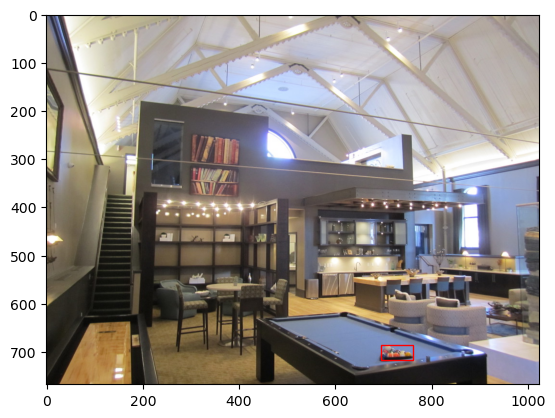

In [368]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import glob
from PIL import Image

test_images_path = 'BallDetection/images/001.Ball/images/test/*.jpg'
train_images_path = 'BallDetection/images/001.Ball/images/train/*.jpg'

def visualize_transposed_bb(dataset):
    images_path = train_images_path if dataset == 'train' else test_images_path if dataset == 'test' else 0
    if images_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    
    start = 0
    end = 0
    
    if dataset == 'train':
        start, end, df, split = 43, 59, final_train_df, "train"
    elif dataset == 'test':
        start, end, df, split = 42, 58, final_test_df, "test"
    else:
        raise Exception("Invalid parameter")
        
    image_folder = images_path
    images_paths = glob.glob(image_folder)
    
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images - 1)
    random_image = images_paths[random_int]
    print(random_image)
    img = Image.open(random_image)
    img = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
    id_of_image = random_image[start:end]
    df_rows = df.loc[(df.ImagePath == f"001.Ball/images/{split}/{id_of_image}.jpg")]
    image_width, image_height = img.size
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    for index, row in df_rows.iterrows():
        print(row['XMin'], row['XMax'], row['YMin'], row['YMax'])
        
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        
        
        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        
        print(new_xmin, new_xmax, new_ymin, new_ymax)
        
        xmax_flipped = (image_width/2) - (new_xmin - (image_width/2))
        xmin_flipped = (image_width/2) - (new_xmax - (image_width/2))
        
        
        width = xmax_flipped - xmin_flipped
        height = new_ymax - new_ymin
        
        rect = patches.Rectangle((xmin_flipped, new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax.add_patch(rect)
    plt.show()
    
visualize_transposed_bb("test")

In [369]:
len(final_test_df)

414

In [370]:
final_test_df

header_cols  label_width className    XMin    YMin    XMax    YMax  \
2921134            2            5     0.000  0.3278  0.4110  0.6396  0.8980   
2876256            2            5     0.000  0.2950  0.4144  0.3538  0.4806   
2470414            2            5     0.000  0.5965  0.7723  0.6316  0.8190   
2300890            2            5     0.000  0.2458  0.4208  0.6729  0.9986   
3534463            2            5     0.000  0.3937  0.4514  0.5227  0.6977   
...              ...          ...       ...     ...     ...     ...     ...   
302772             2            5     0.000  0.3669  0.6904  0.4037  0.7542   
971216             2            5     0.000  0.2856  0.6789  0.3500  0.7598   
377450             2            5     0.000  0.3731  0.8178  0.4487  0.9192   
381398             2            5     0.000  0.7740  0.5232  0.8110  0.5757   
998994             2            5     0.000  0.7000  0.9726  0.7638  0.9991   

                                         ImagePath  
2921134  001.Ball/images/test/2f7d70b9f40700a7.jpg  
2876256  001.Ball/images/test/2eaea7745ff54d59.jpg  
2470414  001.Ball/images/test/27b4c411a5549ec7.jpg  
2300890  001.Ball/images/test/24c59454c53c7ada.jpg  
3534463  001.Ball/images/test/3a1e39794a6e2e83.jpg  
...                                            ...  
302772   001.Ball/images/test/036a67783286cf15.jpg  
971216   001.Ball/images/test/0dfdf2bfa5fc5ac5.jpg  
377450   001.Ball/images/test/047fccb54a6800b2.jpg  
381398   001.Ball/images/test/048d97f6c37be06a.jpg  
998994   001.Ball/images/test/0e788a2c4717285a.jpg  

[414 rows x 8 columns]

In [380]:
test_images_path = 'BallDetection/images/001.Ball/images/test/*.jpg'
train_images_path = 'BallDetection/images/001.Ball/images/train/*.jpg'
def augment_data(dataset):
    images_path = train_images_path if dataset == "train" else test_images_path if dataset == "test" else 0
    if images_path == 0:
            raise Exception("Invalid Input parameter")
    start = 0
    end = 0
    if dataset == "train":
        start, end, df = 22, 38, final_train_df
    elif dataset == "test":
        start, end, df = 21, 37, final_test_df
    
    temp_df = pd.DataFrame(columns = ["header_cols", "label_width", "className", "XMin", "YMin", "XMax", "YMax", "ImagePath"], dtype = object)
    counter = 0
    for index, row in df.iterrows():
        img_path = row["ImagePath"] #image path in the df
        id = img_path[start:end]
        im_path = f"BallDetection/images/001.Ball/images/{dataset}/{id}.jpg" #image path for the physical location of the image (full path)
        img = Image.open(im_path)
        image_width, image_height = img.size
        img_flip = img.transpose(Image.FLIP_LEFT_RIGHT)
        img_flip.save(f"BallDetection/images/001.Ball/images/{dataset}/flipped_{id}.jpg")
        new_image_path = f"001.Ball/images/{dataset}/flipped_{id}.jpg"
        
        xmin = row['XMin'] * image_width
        xmax = row['XMax'] * image_width
        ymin = row['YMin']
        ymax = row['YMax']
        
        #getting the new coordinates for the flipped bounding boxes
        new_xmin = (image_width/2)-(xmin - (image_width/2)) / image_width
        new_xmax = (image_width/2)-(xmax - (image_width/2)) / image_width
        
        temp_df.loc[counter] = [2, 5, "0.000", new_xmin, ymin, new_xmax, ymax, new_image_path]
        counter += 1         
    df_merged = pd.concat([df, temp_df], ignore_index = True)
    df_merged.to_csv(f"{dataset}.lst", sep = "\t", float_format = "%.4f", header = None)
    print(len(df))
    print("augmented length below")
    print(len(temp_df))
        

In [381]:
folder = glob.glob(train_images_path)
counter = 0
for i in folder:
    counter += 1
print(counter)

846


In [382]:
folder = glob.glob(test_images_path)
counter = 0
for i in folder:
    counter += 1
print(counter)

620


In [383]:
len(final_train_df)

1591

In [384]:
len(final_test_df)

414

In [376]:
augment_data("test")

414
augmented length below
414


In [385]:
folder = glob.glob(test_images_path)
counter = 0
for i in folder:
    counter += 1
print(counter)

620


In [386]:
310*2

620

In [387]:
augment_data("train")

1591
augmented length below
1591


In [388]:
folder = glob.glob(train_images_path)
counter = 0
for i in folder:
    counter += 1
print(counter)

1692


In [4]:
import distro  # You may need to install this package using pip(!pip install distro)

if distro.id() == "debian":

    subprocess.run(["apt-get", "update"])

    subprocess.run(["apt-get", "install", "ffmpeg", "libsm6", "libxext6", "-y"])



In [6]:
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install mxnet

ERROR: Could not find a version that satisfies the requirement 4.5.3.56 (from versions: none)
ERROR: No matching distribution found for 4.5.3.56
ERROR: Could not find a version that satisfies the requirement 1.8.0 (from versions: none)
ERROR: No matching distribution found for 1.8.0


In [3]:
RESIZE_SIZE = 256
BASE_DIR = "BallDetection/"

In [12]:
import zipfile
import os

def zip_folder(folder_path, zip_path):
    """
    Compresses a folder and its contents into a zip file.
    
    Args:
    - folder_path (str): Path to the folder to be zipped.
    - zip_path (str): Path where the zip file will be saved.
    """
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                # Add file to zip with relative path inside zip
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Example usage:
folder_to_zip = 'BallDetection'  # Replace with your folder path
zip_file_path = 'BallDetection.zip'  # Replace with desired zip file path

zip_folder(folder_to_zip, zip_file_path)
print(f'Folder {folder_to_zip} zipped successfully to {zip_file_path}')

Folder BallDetection zipped successfully to BallDetection.zip


In [2]:
import sagemaker

bucket = "ball-object-detection-2024"
prefix = "DEMO-ObjectDetection"

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [5]:
from sagemaker import get_execution_role
role = get_execution_role()
sess = sagemaker.Session()

In [6]:
train_channel = prefix + "/train"

sess.upload_data(path = "train.rec", bucket = bucket, key_prefix = train_channel)
s3_train_data = "s3://{}/{}".format(bucket, train_channel)

In [7]:
print(s3_train_data)

s3://ball-object-detection-2024/DEMO-ObjectDetection/train


In [11]:
validation_channel = prefix + "/validation"

sess.upload_data(path = "test.rec", bucket = bucket, key_prefix = validation_channel)
s3_validation_data = "s3://{}/{}".format(bucket, validation_channel)

In [12]:
print(s3_validation_data)

s3://ball-object-detection-2024/DEMO-ObjectDetection/validation


In [13]:
s3_output_location = "s3://{}/{}/output".format(bucket, prefix)

In [14]:
print(s3_output_location)

s3://ball-object-detection-2024/DEMO-ObjectDetection/output


In [16]:
from sagemaker import image_uris

training_image = image_uris.retrieve(
    region = sess.boto_region_name, framework = "object-detection", version = "1"
)

print(training_image)

811284229777.dkr.ecr.us-east-1.amazonaws.com/object-detection:1


In [24]:
import glob

folder = glob.glob("BallDetection/images/001.Ball/images/train/*.jpg")
counter = 0
for i in folder:
    counter += 1
print(counter)

1692


In [71]:
od_model = sagemaker.estimator.Estimator(
    training_image,
    role,
    instance_count = 1,
    instance_type = "ml.p3.2xlarge",
    volume_size = 50,
    max_run = 360000,
    input_mode = "File",
    output_path = s3_output_location,
    sagemaker_session = sess,)

In [72]:
print(od_model)

In [73]:
def set_hyperparameters(num_epochs, lr_steps):
    num_classes = 1
    num_training_samples = 1692
    
    od_model.set_hyperparameters(
        base_network = "resnet-50",
        use_pretrained_model = 1,
        num_classes = num_classes,
        epochs = num_epochs,
        lr_scheduler_step = lr_steps,
        lr_scheduler_factor = 0.1,
        momentum = 0.9,
        weight_decay = 0.0005,
        nms_threshold = 0.45,
        image_shape = 512,
        num_training_samples = 1692
    )
        
        
        
    

In [74]:
set_hyperparameters(100, "50,70,80,90,95")

In [75]:
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges = {
    "learning_rate": ContinuousParameter(0.001, 0.1),
    "mini_batch_size": CategoricalParameter([8, 16]),
    "optimizer": CategoricalParameter(["sgd", "adam"])
}

In [76]:
max_jobs = 8
max_parallel_jobs = 1
objective_metric_name = "validation:mAP"
objective_type = "Maximize"

In [77]:
tuner = HyperparameterTuner(estimator = od_model,
                          objective_metric_name = objective_metric_name,
                          hyperparameter_ranges = hyperparameter_ranges,
                          objective_type = objective_type,
                          max_jobs = max_jobs,
                          max_parallel_jobs = max_parallel_jobs
                          )

In [78]:
train_data = sagemaker.inputs.TrainingInput(
    s3_train_data,
    distribution = "FullyReplicated",
    content_type = "application/x-recordio",
    s3_data_type = "S3Prefix"
)

validation_data = sagemaker.inputs.TrainingInput(
    s3_validation_data,
    distribution = "FullyReplicated",
    content_type = "application/x-recordio",
    s3_data_type = "S3Prefix"
)

data_channels = {"train": train_data, "validation": validation_data}

In [ ]:
tuner.fit(inputs = data_channels, logs = True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


.............................................................................................................................................................................

In [2]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [3]:
sess = sagemaker.Session()
from sagemaker import image_uris

training_image = image_uris.retrieve(
    region = sess.boto_region_name, framework = "object-detection", version = "1"
)
print(training_image)

811284229777.dkr.ecr.us-east-1.amazonaws.com/object-detection:1


In [7]:
model = sagemaker.model.Model(
    image_uri = training_image,
    model_data = 's3://ball-object-detection-2024/DEMO-ObjectDetection/output/object-detection-240625-2143-002-a58aa346/output/model.tar.gz',
    role = role
)

In [24]:
endpoint_name = 'Ball-detection-endpoint-001'

deployment = model.deploy(
    initial_instance_count = 1, 
    instance_type = "ml.m4.xlarge",
    endpoint_name = endpoint_name)

-------------!

In [25]:
import json
import boto3
runtime = boto3.client(service_name = "runtime.sagemaker")

In [53]:
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg

def visualize_detection(img_file, dets, thresh = 0.6):
    img = mpimg.imread(img_file)
    plt.imshow(img)
    width = img.shape[1]
    height = img.shape[0]
    colors = dict()
    num_detections = 0
    for det in dets:
        (klass, score, x0, y0, x1, y1) = det
        if score < thresh:
            continue
        num_detections += 1
        cls_id = int(klass)
        if cls_id not in colors:
            colors[cls_id] = (random.random(), random.random(), random.random())
            xmin = int(x0*width)
            ymin = int(y0*height)
            xmax = int(x1*width)
            ymax = int(y1*width)
            rect = plt.Rectangle(
                (xmin,ymin),
                xmax - xmin, #width
                ymax - ymin, #height
                fill = False,
                edgecolor = colors[cls_id],
                linewidth = 3.5
                )
        plt.gca().add_patch(rect)
        plt.gca().text(
            xmin, ymin,
            "{:.3f}".format(score),
            bbox = dict(facecolor = colors[cls_id], alpha = 0.5),
            fontsize = 12,
            color = "white"
        )
    print("Number of detections" + str(num_detections))
    plt.show()
                 

In [84]:
def show_ball_prediction(filename, ep, thresh = 0.25):
    b = ""
    with open(filename, "rb") as image:
        f = image.read()
        b = bytearray(f)
    endpoint_response = runtime.invoke_endpoint(EndpointName = ep, ContentType = "image/jpeg", Body = b)
    results = endpoint_response["Body"].read()
    detections = json.loads(results)
    
    visualize_detection(filename, detections['prediction'], thresh)
    
    

Number of detections1


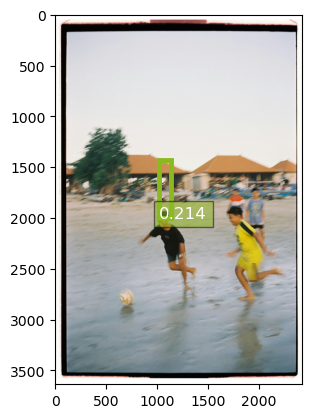

In [85]:
show_ball_prediction('InternetImages/pexels-igonkin-26575339.jpg', endpoint_name)

In [2]:
from datetime import datetime

date_today = datetime.today().strftime('%Y-%m-%d')

year = date_today[0:4]
month = date_today[5:7]
day = date_today[8:10]

In [3]:
import sagemaker
from sagemaker import get_execution_role, image_uris

role = get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [4]:
sess = sagemaker.Session()

training_image = image_uris.retrieve(
    region = sess.boto_region_name, framework = "object-detection", version = "1"
)

print(training_image)

811284229777.dkr.ecr.us-east-1.amazonaws.com/object-detection:1


In [5]:
model = sagemaker.model.Model(
    image_uri = training_image,
    model_data = 's3://ball-object-detection-2024/DEMO-ObjectDetection/output/object-detection-240625-2143-002-a58aa346/output/model.tar.gz',
    role = role
)

In [20]:
transformer = model.transformer(
    instance_count = 1,
    output_path = f's3://ball-detection-batch-transform-2024/batch-output/{year}/{month}/{day}',
    instance_type = 'ml.m4.xlarge')

In [21]:
sample_data_bucket = 'ball-detection-batch-transform-2024'
input_file_path = f'images/{year}/{month}/{day}'

In [23]:
transformer.transform(
    "s3://{}/{}".format(sample_data_bucket, input_file_path), content_type = "image/jpeg")

INFO:sagemaker:Creating transform job with name: object-detection-2024-06-29-21-01-54-295


.......................................................Docker entrypoint called with argument(s): serve
Running default environment configuration script
Running custom environment configuration script
Docker entrypoint called with argument(s): serve
Running default environment configuration script
Running custom environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[06/29/2024 21:11:05 INFO 140557064279872] loaded entry point class algorithm.serve.server_config:config_api
[06/29/2024 21:11:05 INFO 140557064279872] loading entry points
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[06/29/2024 21:11:05 INFO 140557064279872] loaded entry point class algorithm.serve.server_config:config_api
[06/29/2024 21:11:05 INFO 140557064279872] load

In [25]:
print(transformer.output_path)

s3://ball-detection-batch-transform-2024/batch-output/2024/06/29


In [26]:
from datetime import datetime

date_today = datetime.today().strftime('%Y-%m-%d')

year = date_today[0:4]
month = date_today[5:7]
day = date_today[8:10]

print(date_today)



2024-06-29


In [31]:
import boto3

s3 = boto3.resource('s3')


my_bucket = s3.Bucket('ball-detection-batch-transform-2024')

files = []

for object_summary in my_bucket.objects.filter(Prefix = f'batch-output/{year}/{month}/{day}'):
    out_file = object_summary.key[24:]
    files.append(out_file)

In [32]:
print(files)

['pexels-markusspiske-1752757.jpg.out', 'pexels-oandremoura-2471259.jpg.out', 'pexels-pixabay-274506.jpg.out', 'pexels-pixabay-47813.jpg.out']


In [38]:
!mkdir -p Batch_test_images

Number of detections1


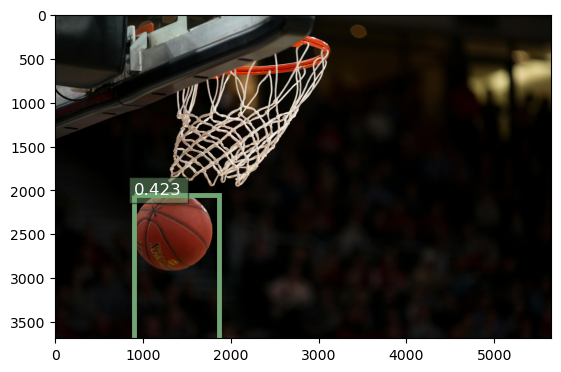

Number of detections1


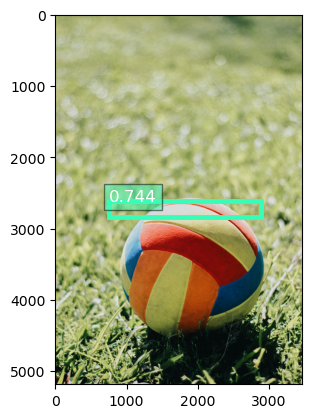

Number of detections1


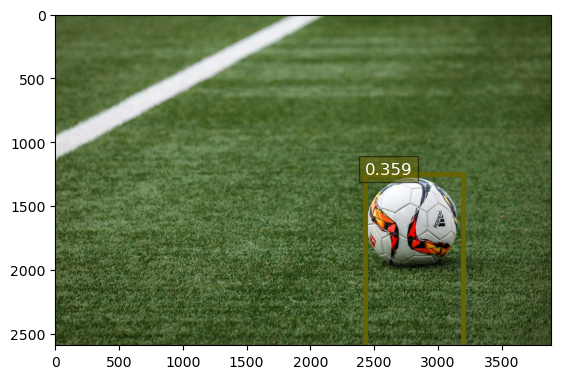

Number of detections1


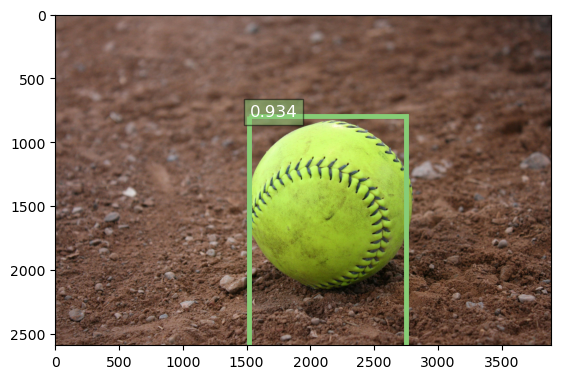

In [41]:
import json
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sagemaker.s3 import S3Downloader

num_detections = []
thresh = 0.3

for i in files:
    file_key = f's3://ball-detection-batch-transform-2024/batch-output/{year}/{month}/{day}/{i}'
    file_name_in_sagemaker = f'Batch_test_images/{i[:-4]}'
    output = S3Downloader.read_file(file_key)
    detections = json.loads(output)
    detection_results = detections['prediction']
    img = mpimg.imread(file_name_in_sagemaker)
    plt.imshow(img)
    width = img.shape[1]
    height = img.shape[0]
    colors = dict()
    num_detections = 0
    for det in detection_results:
        (klass, score, x0, y0, x1, y1) = det
        if score < thresh:
            continue
        num_detections += 1
        cls_id = int(klass)
        if cls_id not in colors:
            colors[cls_id] = (random.random(), random.random(), random.random())
            xmin = int(x0*width)
            ymin = int(y0*height)
            xmax = int(x1*width)
            ymax = int(y1*width)
            rect = plt.Rectangle(
                (xmin,ymin),
                xmax - xmin, #width
                ymax - ymin, #height
                fill = False,
                edgecolor = colors[cls_id],
                linewidth = 3.5
                )
        plt.gca().add_patch(rect)
        plt.gca().text(
            xmin, ymin,
            "{:.3f}".format(score),
            bbox = dict(facecolor = colors[cls_id], alpha = 0.5),
            fontsize = 12,
            color = "white"
        )
    print("Number of detections" + str(num_detections))
    plt.show()


In [2]:
import os
import zipfile

def zip_directory(directory_path, output_path):
    # Create a ZipFile object
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(directory_path):
            for file in files:
                # Create the complete file path
                file_path = os.path.join(root, file)
                # Write the file to the zip archive
                zipf.write(file_path, os.path.relpath(file_path, directory_path))

# Example usage
directory_to_zip = 'BallDetection'
output_zip_file = 'Zipped_BallDetection'

zip_directory(directory_to_zip, output_zip_file)